In [1]:
import matplotlib.pyplot as plt
from models import MeshModel, IcosphereModel
from jax.typing import ArrayLike
from models.mesh_transform import add_rotation, evaluate_rotation, transform
from models.spots import add_spots
from models.binary import Binary, add_orbit, evaluate_orbit
from models.utils import cast_to_los
from plots import plot_3D
from spectrum import simulate_spectrum, blackbody_intensity
import astropy.units as u
import astropy.constants as const
import jax.numpy as jnp
import numpy as np

from jax import config
from jax import jit
config.update("jax_enable_x64", True)

m1 = IcosphereModel.construct(1000, u.solRad.to(u.cm), 1.*u.solMass.to(u.kg), 1., jnp.concatenate([jnp.array([3.75]), jnp.ones(19)]))
m2 = transform(IcosphereModel.construct(1000, u.solRad.to(u.cm), 1.*u.solMass.to(u.kg), 1., jnp.concatenate([jnp.array([3.75]), jnp.ones(19)])), 3*u.solRad.to(u.cm))

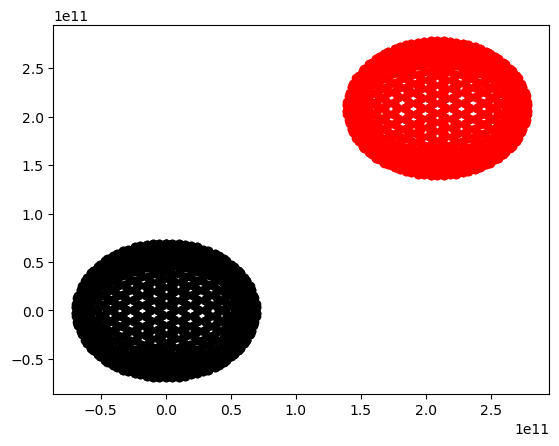

In [2]:
plt.scatter(m1.centers[:, 0], m1.centers[:, 1], color='black')
plt.scatter(m2.centers[:, 0], m2.centers[:, 1], color='red')

In [3]:
b = Binary.from_bodies(m1, m2)

In [4]:
# P: float, ecc: float,
#               T: float, i: float, omega: float, Omega: float, orbit_resolution_points: ArrayLike
bo = add_orbit(b, .1, 0., 0., 0., 0., 0., 100)

In [5]:
import jax
from models.mesh_transform import evaluate_body_orbit
from typing import Tuple



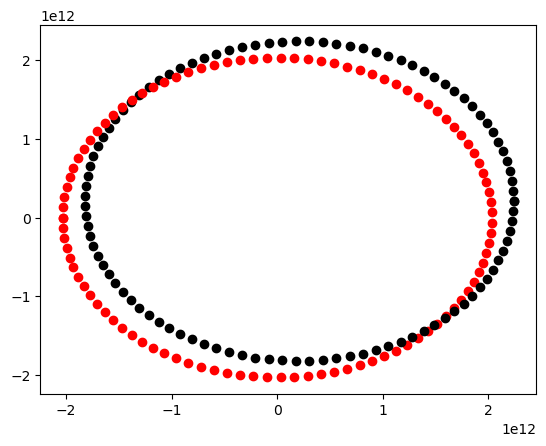

In [6]:
for i in np.linspace(0, .1, 100):
    b1, b2 = evaluate_orbit(bo, i)
    plt.scatter(b1.center[0], b1.center[1], c='red')
    plt.scatter(b2.center[0], b2.center[1], color='black')

In [7]:
evaluate_orbit_at_times = jax.jit(jax.vmap(evaluate_orbit, in_axes=(None, 0)))

In [8]:
b1s, b2s = evaluate_orbit_at_times(bo, jnp.linspace(0, 0.1, 100))